In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


training_samples = pd.read_csv("train-set.csv", names=["ex1","ex2","ac"])
print(training_samples.head(10))

         ex1        ex2  ac
0  34.623660  78.024693   0
1  30.286711  43.894998   0
2  35.847409  72.902198   0
3  60.182599  86.308552   1
4  79.032736  75.344376   1
5  45.083277  56.316372   0
6  61.106665  96.511426   1
7  75.024746  46.554014   1
8  76.098787  87.420570   1
9  84.432820  43.533393   1


          x1         x2        x1_x2         x1_2         x2_2
0  34.623660  78.024693  2701.500406  1198.797806  6087.852689
1  30.286711  43.894998  1329.435094   917.284849  1926.770808
2  35.847409  72.902198  2613.354893  1285.036716  5314.730477
3  60.182599  86.308552  5194.273014  3621.945269  7449.166165
4  79.032736  75.344376  5954.672216  6246.173368  5676.775061
5  45.083277  56.316372  2538.926616  2032.501908  3171.533731
6  61.106665  96.511426  5897.491326  3734.024451  9314.455326
7  75.024746  46.554014  3492.703021  5628.712447  2167.276177
8  76.098787  87.420570  6652.599288  5791.025338  7642.356010
9  84.432820  43.533393  3675.647160  7128.901087  1895.156333


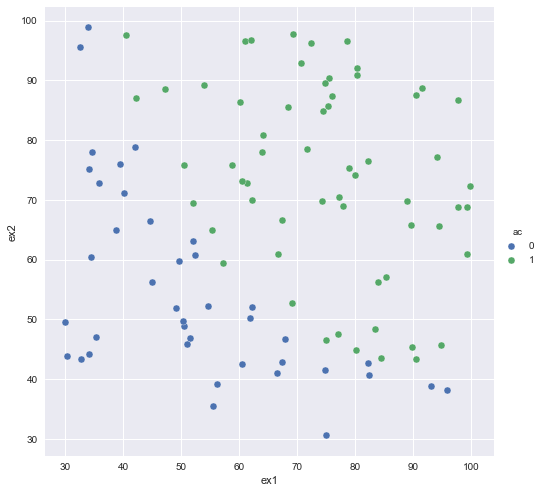

In [3]:
#Original features
ex1 = training_samples[["ex1"]]
ex2 = training_samples[["ex2"]]

#Non linear features
ex3 = ex1.mul(ex2.values)
ex4 = ex1.mul(ex1.values)
ex5 = ex2.mul(ex2.values)

features = pd.concat([ex1,ex2,ex3,ex4,ex5], axis=1)
features.columns = ["x1","x2","x1_x2","x1_2","x2_2"]
labels = training_samples[["ac"]]
print(features.head(10))


trained_results = pd.concat([ex1, ex2, pd.DataFrame(labels)], axis=1)
trained_results.columns = ['ex1','ex2','ac']
sns.pairplot(x_vars=["ex1"], y_vars=["ex2"], data = trained_results,hue="ac", size=7)

In [4]:
model = linear_model.LogisticRegression()
model.fit(features, labels.values.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [5]:
test_samples = pd.read_csv("test-set.csv",names=["ex1","ex2","ac"])
test_ex1 = test_samples[["ex1"]]
test_ex2 = test_samples[["ex2"]]
test_ex3 = test_ex1.mul(test_ex2.values)
test_ex4 = test_ex1.mul(test_ex1.values)
test_ex5 = test_ex2.mul(test_ex2.values)

test_features = pd.concat([test_ex1,test_ex2,test_ex3,test_ex4,test_ex5], axis=1)
test_features.columns = ["x1","x2","x1_x2","x1_2","x2_2"]

expected_labels = test_samples[["ac"]]

predicted_labels = model.predict(test_features)

             precision    recall  f1-score   support

   ACCEPTED       0.91      1.00      0.95        10
   REJECTED       1.00      0.90      0.95        10

avg / total       0.95      0.95      0.95        20

SCORE : 0.95


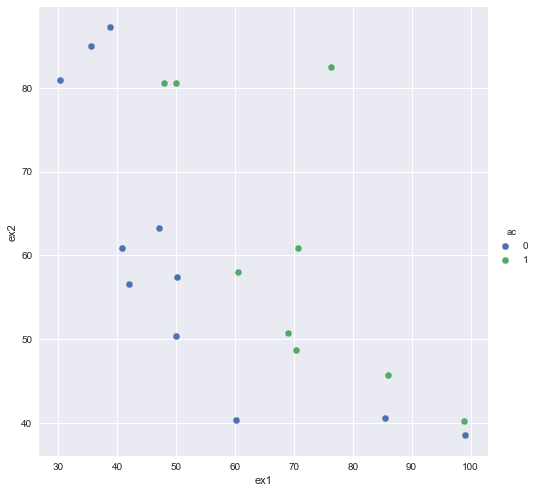

In [8]:

test_results = pd.concat([test_ex1, test_ex2, pd.DataFrame(predicted_labels)], axis=1)
test_results.columns = ['ex1','ex2','ac']

sns.pairplot(x_vars=["ex1"], y_vars=["ex2"], data = test_results, hue="ac", size=7)

from sklearn import metrics
print(metrics.classification_report(expected_labels, predicted_labels, target_names = ["ACCEPTED", "REJECTED"]))
print("SCORE : {0}".format(metrics.accuracy_score(expected_labels, predicted_labels)))